Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


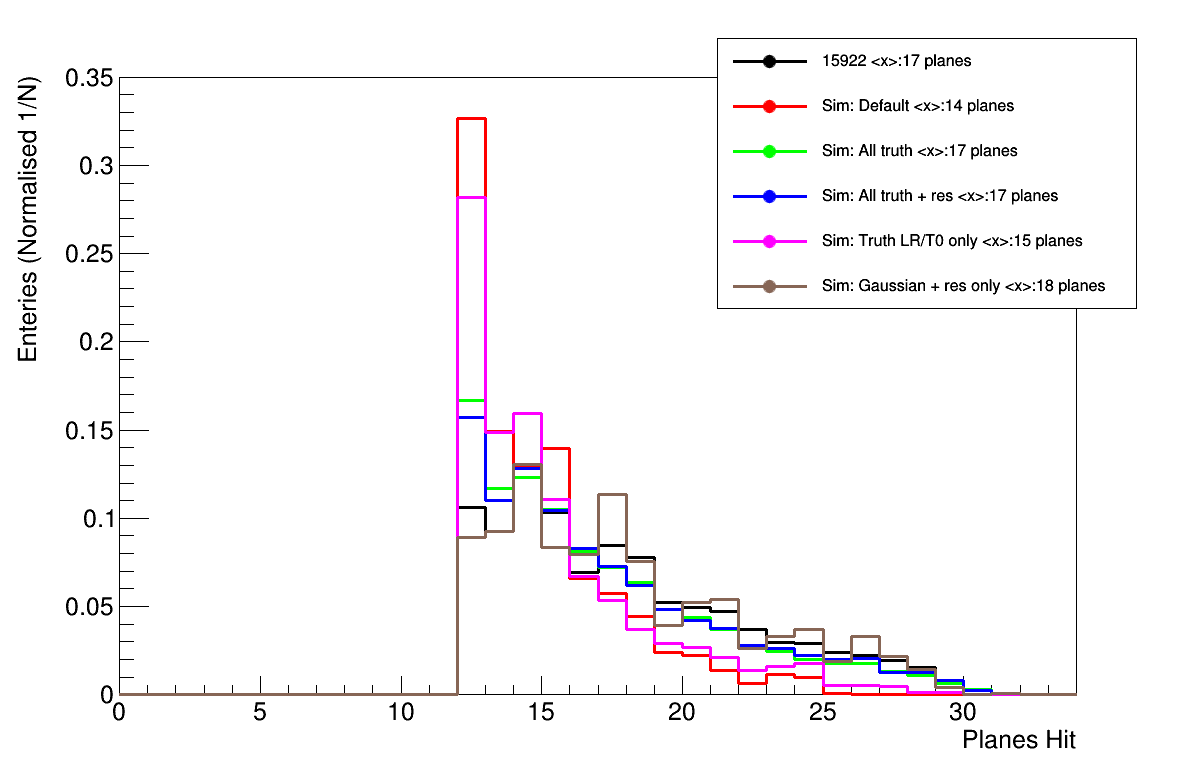

In [24]:
import sys
import numpy as np
sys.path.append("/usr/local/Cellar/root/6.16.00_3/lib/root")
from ROOT import TCanvas, TLegend, TFile, TH1, TH2, gStyle

#File paths
dataFile = "/Users/gleb/software/alignTrack/mpIIDESY/MDC1_CBO/TP_15922.root"
simFile =  "/Users/gleb//software/alignTrack/mpIIDESY/MDC1_CBO/TP_def.root"
simFile_truth =  "/Users/gleb//software/alignTrack/mpIIDESY/MDC1_CBO/TP_truth.root"
simFile_res =  "/Users/gleb//software/alignTrack/mpIIDESY/MDC1_CBO/TP_truth_res.root"
simFile_truthLRT0 =  "/Users/gleb//software/alignTrack/mpIIDESY/MDC1_CBO/TP_truth_truthLRT0.root"
simFile_defLRT0 =  "/Users/gleb//software/alignTrack/mpIIDESY/MDC1_CBO/TP_truth_defLRT0.root"

file_path = [dataFile, simFile, simFile_truth, simFile_res, simFile_truthLRT0, simFile_defLRT0]
name_legend = ["15922", "Sim: Default", "Sim: All truth", "Sim: All truth + res", "Sim: Truth LR/T0 only", "Sim: Gaussian + res only"]

statesN = len(file_path)
colors = [1, 2, 3, 4, 6, 28]

#storage containers
fileArray=[]
plotArray=[]

can = TCanvas("", "", 1200, 800)
legend = TLegend(0.6, 0.6, 0.95, 0.95)

for i_state in range(0, statesN):
    
    file = TFile.Open(file_path[i_state])
    fileArray.append(file)
        
    #Get the source TH1/TH2 (differnt rule for data)
#     if(i_state==0):
#         path = "QualityCuts/AfterCuts/Tracks/P"
#     else:
#         path = "TrackSummaryS12/FitResults/P"
#     path="Extrapolation/vertices/station12/h_radialPos"
    path="TrackSummaryS12/nPlanesHit/nPlanesHit"
#     print(path)
    
    plot = file.Get(path)
    plotArray.append(plot)
    
#     print(plot)
    
    #Normalise w.r.t to data 
#     plot.Rebin(2)
    norm = plot.GetEntries();
    plot.Scale(1/norm); # normalise the histo 
    plot.GetYaxis().SetTitle("Enteries (Normalised 1/N)")
    plot.SetTitle("")
    
    if(i_state == 0):
        plot.Draw("hist")
#         pass
#     elif (i_state == 0):
#         plot.Draw("E1")
    else:
        plot.Draw("same hist")
        
    plot.SetLineColor(int(colors[i_state]))
    legend.AddEntry(plot, name_legend[i_state]+" <x>:"+str(round( plot.GetMean()) ) + " planes" )
    gStyle.SetOptStat(0)
    gStyle.SetErrorX(0)
    plot.GetYaxis().SetRangeUser(0.0, 0.35)
    plot.GetXaxis().SetRangeUser(0, 50)
    plot.SetMarkerStyle(20)
    plot.SetMarkerSize(1.5)
    plot.SetLineWidth(3)
    plot.SetMarkerColor(int(colors[i_state]))
    
    
    
legend.Draw()
can.Draw() 